In [90]:
import numpy as np
import os
import matplotlib.pyplot as plt
import gzip
import math
import scipy.stats
from dtw import dtw
from numpy.linalg import norm
from scipy.signal import savgol_filter

measures      = ['degree', 'clustering', 'pagerank', 'betweenness', 'closeness', 'constraint']  
top_directors = {   'nm0000184' : 'G Lucas',
                    'nm0000233' : 'Q Tarantino',
                    'nm0000229' : 'S Spielberg',
                    'nm0000040' : 'S Kubrick',
                    'nm0634240' : 'C Nolan',
                    'nm0000033' : 'A Hitchcock',
                    'nm0000122' : 'Charlie Chaplin',
                    'nm0000631' : 'Ridley Scott',
                    'nm0001053' : 'E Coen',
                    'nm0000142' : 'C Eastwood',
                    'nm0001392' : 'P Jackson',
                    'nm0000591' : 'R Polanski',
                    'nm0000154' : 'M Gibson',
                    'nm0001232' : 'M Forman',   
                    'nm0001628' : 'S Pollack'}


def round_up_to_odd(f):
    return np.ceil(f) // 2 * 2 + 1

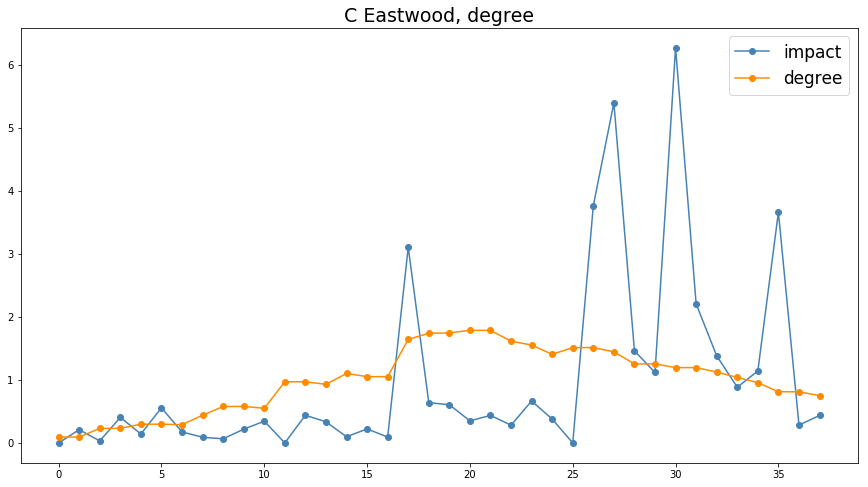

In [75]:
def get_centralities(dirid, measures, column = 1):

    centralities = {}

    for line in open('NEWTemporal/4_directors_centralities/' +dirid+'.dat'):
        
        fields = line.strip().split('\t')
        fields = [float(f) for f in fields]
        centralities[fields[0]] = fields[column]
        
    return centralities, measures[column-1]



def get_plot(ax, centralities, dirid, name, meas):
    
    x = []
    y = []
    z = []

    for line in gzip.open('simple-careers/film-director-simple-careers/' + dirid + '_director_simple_career.gz'):

        if 'year' not in line:
            fields = line.strip().split()
            year   = float(fields[1])
            impact = float(fields[3])

            if year in centralities:

                x.append(year)
                y.append(impact)
                z.append(centralities[year])
                
 
    y, z, x = zip(*sorted([ (y[ijk], z[ijk], x[ijk]) for ijk in range(len(x)) ], key=lambda tup: tup[2]))    


    zavg = np.mean(z)

    z = [zz/zavg for zz in z]
   # y = [math.log(yy) for yy in y]
    yavg = np.mean(y)

    y = [yy/yavg for yy in y]



    ax.set_title(name + ', ' + meas, fontsize = 19)
    ax.plot(y, 'o-', color = 'steelblue', label = 'impact')
    ax.plot(z, 'o-', color = 'darkorange', label = meas)
    ax.legend(loc = 'best', fontsize = 17)



dirid     = 'nm0000142'
    
centralities, meas = get_centralities(dirid, measures, column = 1)

f, ax = plt.subplots(1,1,figsize=(15,8))
get_plot(ax, centralities, dirid, top_directors[dirid], meas)


    

# Different measures for Lucas and Spielberg

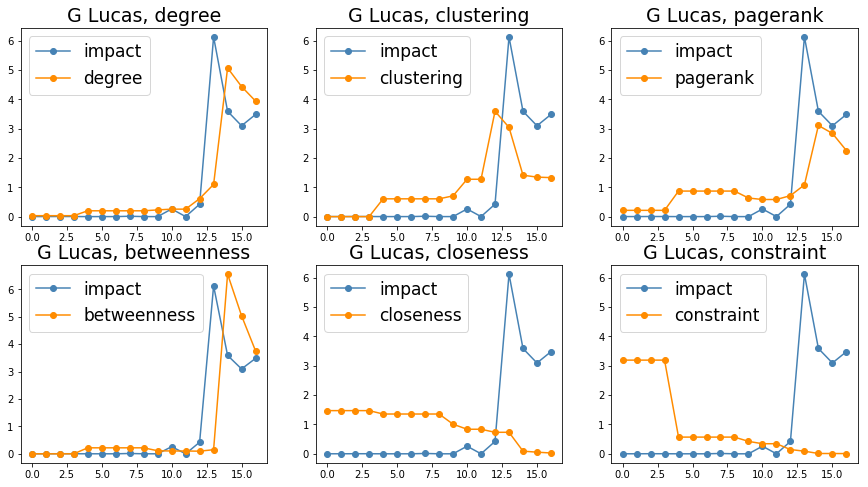

In [76]:
f, ax = plt.subplots(2,3,figsize=(15,8))
dirid = 'nm0000184'

centralities, meas = get_centralities(dirid, measures, column = 1)
get_plot(ax[0,0], centralities, dirid, top_directors[dirid], meas)

centralities, meas = get_centralities(dirid, measures, column = 2)
get_plot(ax[0,1], centralities, dirid, top_directors[dirid], meas)

centralities, meas = get_centralities(dirid, measures, column = 3)
get_plot(ax[0,2], centralities, dirid, top_directors[dirid], meas)

centralities, meas = get_centralities(dirid, measures, column = 4)
get_plot(ax[1,0], centralities, dirid, top_directors[dirid], meas)

centralities, meas = get_centralities(dirid, measures, column = 5)
get_plot(ax[1,1], centralities, dirid, top_directors[dirid], meas)

centralities, meas = get_centralities(dirid, measures, column = 6)
get_plot(ax[1,2], centralities, dirid, top_directors[dirid], meas)

plt.savefig('1_diffmeasures_lucas')

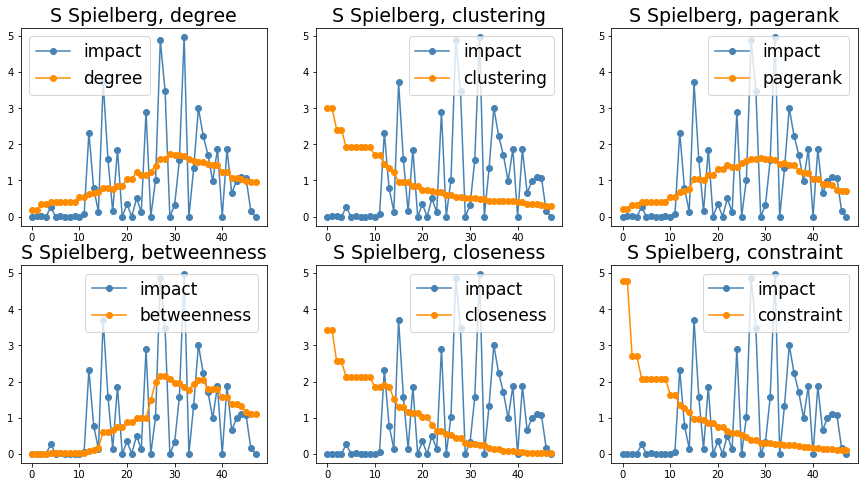

In [77]:
f, ax = plt.subplots(2,3,figsize=(15,8))
dirid = 'nm0000229'


centralities, meas = get_centralities(dirid, measures, column = 1)
get_plot(ax[0,0], centralities, dirid, top_directors[dirid], meas)

centralities, meas = get_centralities(dirid, measures, column = 2)
get_plot(ax[0,1], centralities, dirid, top_directors[dirid], meas)

centralities, meas = get_centralities(dirid, measures, column = 3)
get_plot(ax[0,2], centralities, dirid, top_directors[dirid], meas)

centralities, meas = get_centralities(dirid, measures, column = 4)
get_plot(ax[1,0], centralities, dirid, top_directors[dirid], meas)

centralities, meas = get_centralities(dirid, measures, column = 5)
get_plot(ax[1,1], centralities, dirid, top_directors[dirid], meas)

centralities, meas = get_centralities(dirid, measures, column = 6)
get_plot(ax[1,2], centralities, dirid, top_directors[dirid], meas)

plt.savefig('1_diffmeasures_spielberg')

# Degree for different big names

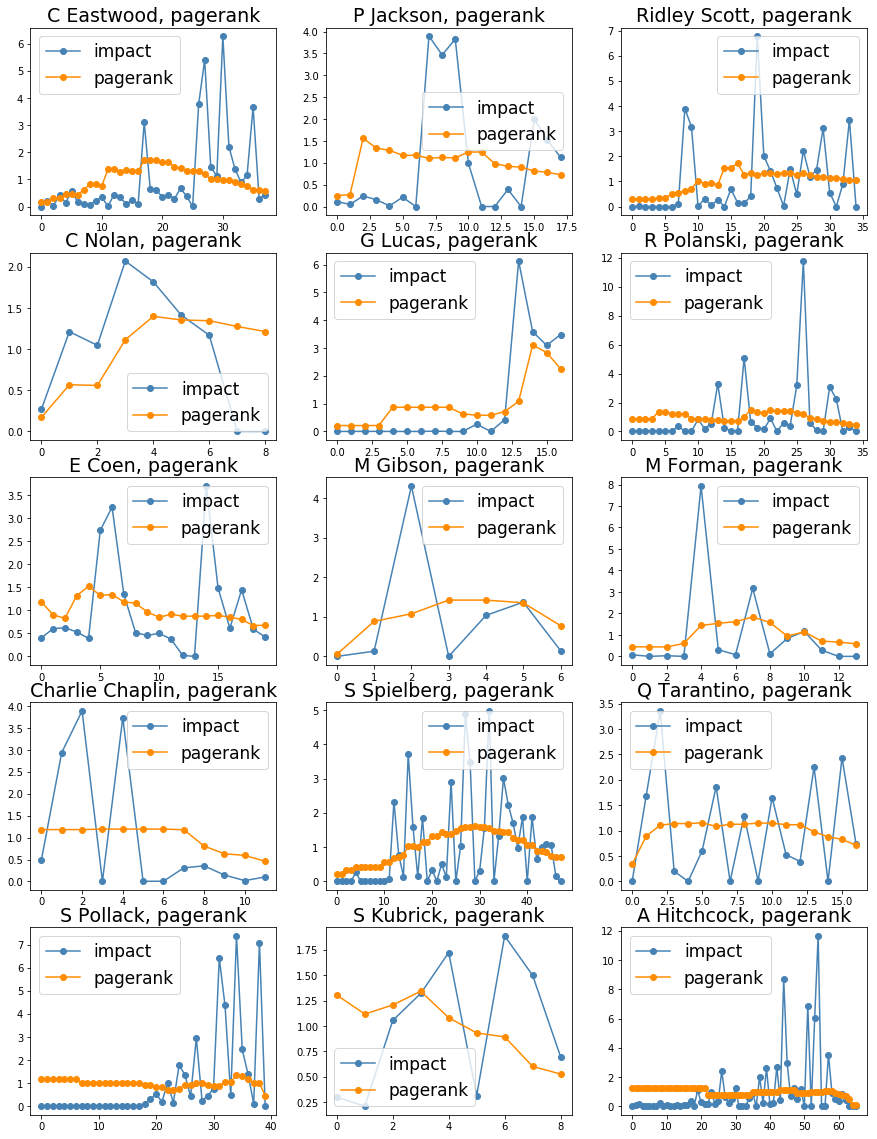

In [78]:
measid   = 3
f, ax    = plt.subplots(5, 3, figsize = (15,20))
indicies = [(i,j) for i in range(5) for j in range(3)]

for ind, (dirid, name) in enumerate(top_directors.items()):
    
    centralities, meas = get_centralities(dirid, measures, column = measid)
    get_plot(ax[indicies[ind]], centralities, dirid, top_directors[dirid], meas)
    
plt.savefig('2_diffdirectors_pagerank')

In [ ]:
measid   = 3
f, ax    = plt.subplots(5, 3, figsize = (15,20))
indicies = [(i,j) for i in range(5) for j in range(3)]

for ind, (dirid, name) in enumerate(top_directors.items()):
    
    centralities, meas = get_centralities(dirid, measures, column = measid)
    get_plot(ax[indicies[ind]], centralities, dirid, top_directors[dirid], meas)
    
plt.savefig('2_diffdirectors_degree')

# Differnet alignments

17 5.0
48 17.0
17 5.0
38 13.0
35 11.0


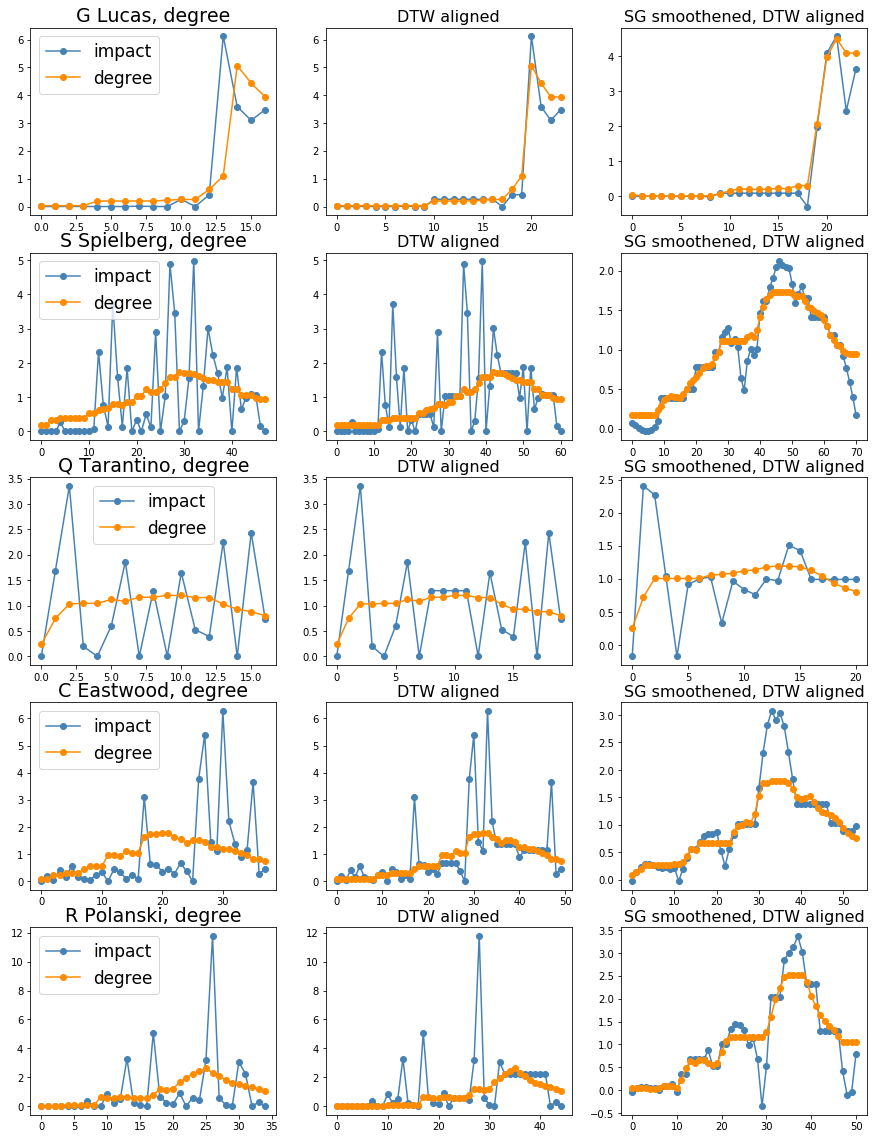

In [100]:
def get_aligned_plot(ax, centralities, dirid, name, meas):
    
    x = []
    y = []
    z = []

    for line in gzip.open('simple-careers/film-director-simple-careers/' + dirid + '_director_simple_career.gz'):

        if 'year' not in line:
            fields = line.strip().split()
            year   = float(fields[1])
            impact = float(fields[3])

            if year in centralities:

                #if impact == 0: impact = 1
              
                x.append(year)
                y.append(impact)
                #y.append(math.log(impact))
                z.append(centralities[year])
                
        
        
    # raw plot
    y, z, x = zip(*sorted([ (y[ijk], z[ijk], x[ijk]) for ijk in range(len(x)) ], key=lambda tup: tup[2]))    
    zavg    = np.mean(z)
    z       = [zz/zavg for zz in z]
    yavg    = np.mean(y)
    y       = [yy/yavg for yy in y]
    
    y_raw   = list(y)
    z_raw   = list(z)

    ax[0].set_title(name + ', ' + meas, fontsize = 19)
    ax[0].plot(y, 'o-', color = 'steelblue',  label = 'impact')
    ax[0].plot(z, 'o-', color = 'darkorange', label = meas)
    ax[0].legend(loc = 'best', fontsize = 17)
    
    
    # dtw aligned
    x_dtw = np.array(y).reshape(-1, 1)
    y_dtw = np.array(z).reshape(-1, 1)
    dist, cost, acc, path = dtw(x_dtw, y_dtw, dist=lambda x_dtw, y_dtw: norm(x_dtw - y_dtw, ord=1))
    map_x, map_y = path
    ax[1].plot(x_dtw[map_x], 'o-', color = 'steelblue',  label = 'impact')  
    ax[1].plot(y_dtw[map_y], 'o-', color = 'darkorange', label = meas)  
    ax[1].set_title('DTW aligned', fontsize = 16)  

    
    # smoothened, aligned
    print len(y_raw), round_up_to_odd(len(y_raw)/3)
    x = savgol_filter(y_raw, int(round_up_to_odd(len(y_raw)/3)), 3)   
    y = savgol_filter(z_raw, 5, 2)       
    x = np.asarray(x).reshape(-1, 1)
    y = np.asarray(y).reshape(-1, 1)
    dist, cost, acc, path = dtw(x, y, dist=lambda x, y: norm(x - y, ord=1))
    map_x, map_y = path
    ax[2].plot(x[map_x], 'o-', color = 'steelblue', label = 'impacts')  
    ax[2].plot(y[map_y], 'o-', color = 'darkorange', label = meas)  
    ax[2].set_title('SG smoothened, DTW aligned', fontsize = 16)        
  
    

    
f, ax    = plt.subplots(5, 3, figsize = (15,20))

for ind, dirid in enumerate(['nm0000184', 'nm0000229',  'nm0000233', 'nm0000142', 'nm0000591']):

    #if ind == 1: break
    
    centralities, meas = get_centralities(dirid, measures, column = 1)
    get_aligned_plot(ax[ind, 0:], centralities, dirid, top_directors[dirid], meas)

plt.savefig('3_directors_aligned_smoothened')
   

In [111]:
# folder = 'NEWTemporal/4_directors_centralities/'
# files  = os.listdir(folder)
# sum([1 for fn in files if len([line.strip() for line in open(folder + fn)]) > 9])   

In [8]:
import os
import gzip
files = os.listdir('simple-careers/film-director-simple-careers/')
NNN = 0
for ind, fn in enumerate(files):
    if ind == 100: break
    length = 0
    for line in gzip.open('simple-careers/film-director-simple-careers/' + fn):
        try:
            fields = 
            i = float(line.strip().split('\t')[3])
            length += 1
        except:
            pass
        
    if length > 9:
        NNN += 1
        
        
print NNN

10
